In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from collections import Counter

In [ ]:
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = pd.Categorical.from_codes(wine.target, wine.target_names)

print(df_wine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline   target  
0         

In [75]:
X_all = wine.data
y_all = wine.target
feature_names = wine.feature_names

In [76]:
def euclidean_distance(p, q):
    distance = np.sqrt(np.sum(np.array(p) - np.array(q)) ** 2)
    return distance

class KNearestNeighbours:

    def __init__(self, k=5):
        self.k = k
        self.point = None

    def fit(self, points):
        self.points = points

    def predict(self, new_point):
        distances = []
        for label, pts in self.points.items():
            for point in pts:
                distances.append((euclidean_distance(point, new_point), label))
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:self.k]
        labels = [label for (_, label) in neighbors]
        return Counter(labels).most_common(1)[0][0]

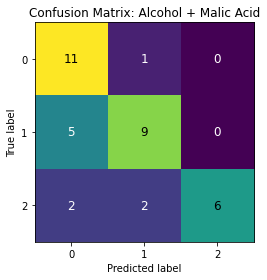

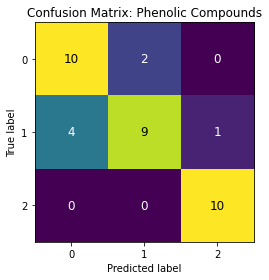

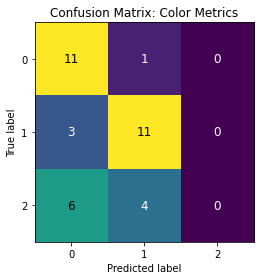

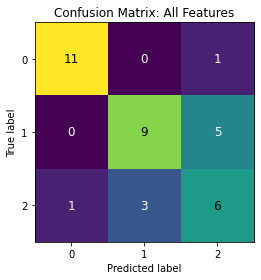

            Feature Set  Num Features  Accuracy
0  Alcohol + Malic Acid             2  0.722222
1    Phenolic Compounds             4  0.805556
2         Color Metrics             3  0.611111
3          All Features            13  0.722222


In [102]:
feature_sets = {
    "Alcohol + Malic Acid": ["alcohol", "malic_acid"],
    "Phenolic Compounds": ["total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins"],
    "Color Metrics": ["color_intensity", "hue", "od280/od315_of_diluted_wines"],
    "All Features": feature_names
}

results = []
y_pred = []

for set_name, feats in feature_sets.items():
    # Get column indices
    indices = [feature_names.index(f) for f in feats]
    X = X_all[:, indices]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_all, test_size=0.2, random_state=42, stratify=y_all
    )
    
    # Points dictionary
    points = {cls: X_train[y_train == cls].tolist() for cls in np.unique(y_train)}
    
    # Fit k-NN from scratch and predict
    knn = KNearestNeighbours(k=60)
    knn.fit(points)
    y_pred = [knn.predict(x) for x in X_test]

    if set_name == "Alcohol + Malic Acid":
        saved_pred = y_pred
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results.append({"Feature Set": set_name, "Num Features": len(feats), "Accuracy": acc})

    # Determine unique class labels
    classes = np.unique(np.concatenate((y_test, y_pred)))

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest')

    # Set tick positions and labels
    ax.set(
        xticks=np.arange(len(classes)),
        yticks=np.arange(len(classes)),
        xticklabels=classes,
        yticklabels=classes,
        xlabel='Predicted label',
        ylabel='True label'
    )

    # Annotate cells
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = 'black' if cm[i, j] > thresh else 'white'
            ax.text(
                j, i, cm[i, j],
                ha='center', va='center',
                color=color, fontsize=12
            )

    ax.set_title(f'Confusion Matrix: {set_name}')
    plt.tight_layout()
    plt.show()

df_results = pd.DataFrame(results)
print(df_results)

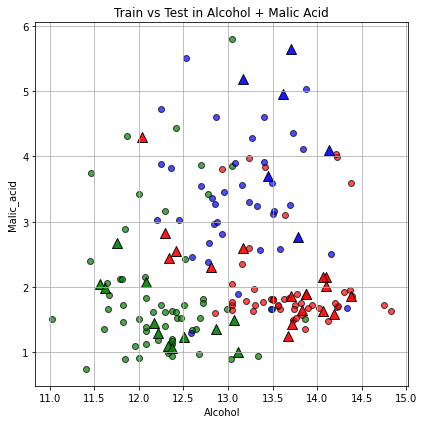

In [105]:
features = ["alcohol", "malic_acid"]

colors = ['r','g','b']
class_labels = wine.target_names

fig, ax = plt.subplots(figsize=(6,6))

for cls in np.unique(y_train):
    mask = (y_train == cls)
    ax.scatter(
        X_train[mask,0], X_train[mask,1],
        c=colors[cls],
        marker='o',
        label=f"Train: {class_labels[cls]}",
        edgecolor='k',
        alpha=0.7
    )

for cls in np.unique(saved_pred):
    mask = (saved_pred == cls)
    ax.scatter(
        X_test[mask,0], X_test[mask,1],
        c=colors[cls],
        marker='^',
        label=f"Test pred: {class_labels[cls]}",
        edgecolor='k',
        alpha=0.9,
        s=100
    )

ax.set_xlabel(features[0].capitalize())
ax.set_ylabel(features[1].capitalize())
ax.set_title("Train vs Test in Alcohol + Malic Acid")
plt.tight_layout()
plt.grid()
plt.show()

## SCIKIT LEARN

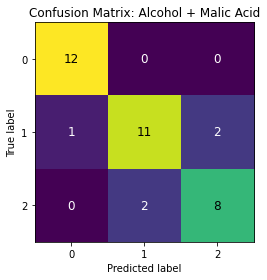

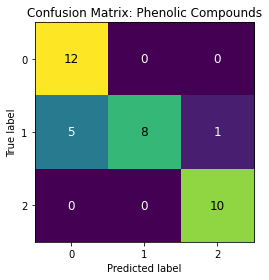

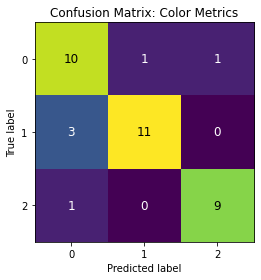

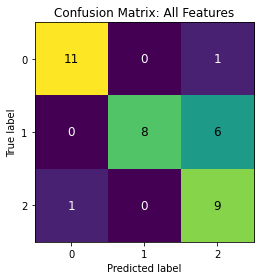

            Feature Set  Num Features  Accuracy
0  Alcohol + Malic Acid             2  0.861111
1    Phenolic Compounds             4  0.833333
2         Color Metrics             3  0.833333
3          All Features            13  0.777778


In [ ]:
results = []

for set_name, feats in feature_sets.items():
    # Get column indices
    indices = [feature_names.index(f) for f in feats]
    X = X_all[:, indices]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_all, test_size=0.2, random_state=42, stratify=y_all
    )
    
    # Points dictionary
    points = {cls: X_train[y_train == cls].tolist() for cls in np.unique(y_train)}
    
    # Fit scikit k-NN and predict
    knn_scikit = KNeighborsClassifier(20)
    knn_scikit.fit(X_train, y_train)
    scikit_predicted = knn_scikit.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, scikit_predicted)
    cm = confusion_matrix(y_test, scikit_predicted)
    results.append({"Feature Set": set_name, "Num Features": len(feats), "Accuracy": acc})

    # Determine unique class labels
    classes = np.unique(np.concatenate((y_test, scikit_predicted)))

    # Plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest')

    # Set tick positions and labels
    ax.set(
        xticks=np.arange(len(classes)),
        yticks=np.arange(len(classes)),
        xticklabels=classes,
        yticklabels=classes,
        xlabel='Predicted label',
        ylabel='True label'
    )
    
    # Annotate cells
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = 'black' if cm[i, j] > thresh else 'white'
            ax.text(
                j, i, cm[i, j],
                ha='center', va='center',
                color=color, fontsize=12
            )

    ax.set_title(f'Confusion Matrix: {set_name}')
    plt.tight_layout()
    plt.show()

df_results = pd.DataFrame(results)
print(df_results)

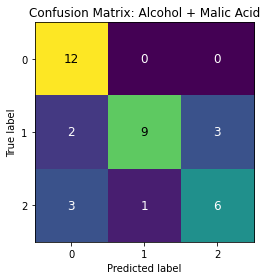

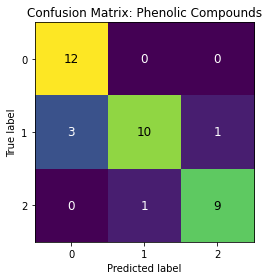

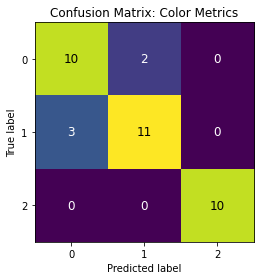

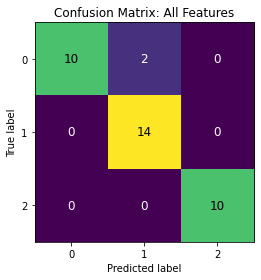

            Feature Set  Num Features  Accuracy
0  Alcohol + Malic Acid             2  0.750000
1    Phenolic Compounds             4  0.861111
2         Color Metrics             3  0.861111
3          All Features            13  0.944444


In [91]:
results = []

for set_name, feats in feature_sets.items():
    # Get column indices
    indices = [feature_names.index(f) for f in feats]
    X = X_all[:, indices]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_all, test_size=0.2, random_state=42, stratify=y_all
    )
    
    # Points dictionary
    points = {cls: X_train[y_train == cls].tolist() for cls in np.unique(y_train)}
    
    # Fit Decision Tree and predict
    tree_scikit = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=4,
    random_state=42
)
    tree_scikit.fit(X_train, y_train)
    scikit_predicted = tree_scikit.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, scikit_predicted)
    cm = confusion_matrix(y_test, scikit_predicted)
    results.append({"Feature Set": set_name, "Num Features": len(feats), "Accuracy": acc})

    # Determine unique class labels
    classes = np.unique(np.concatenate((y_test, scikit_predicted)))

    # Plot
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest')

    # Set tick positions and labels
    ax.set(
        xticks=np.arange(len(classes)),
        yticks=np.arange(len(classes)),
        xticklabels=classes,
        yticklabels=classes,
        xlabel='Predicted label',
        ylabel='True label'
    )

    # Annotate cells
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = 'black' if cm[i, j] > thresh else 'white'
            ax.text(
                j, i, cm[i, j],
                ha='center', va='center',
                color=color, fontsize=12
            )

    ax.set_title(f'Confusion Matrix: {set_name}')
    plt.tight_layout()
    plt.show()

df_results = pd.DataFrame(results)
print(df_results)